In [1]:
import pandas as pd
import textstat

In [2]:
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv(r"D:\data\openparliament\statements_nospeaker_en.csv")

df.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\alecr\Anaconda3\envs\gensim_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (20,23,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,slug,urlcache,h1_fr,h2_fr,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length
0,2611,3465,35066,4,2005-11-29,1997-09-22,232373,1878,2001-05-03 13:50:00-04,Government Orders,...,marlene-catterall-1,/debates/2001/5/3/marlene-catterall-1/,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a'...",3
1,3210,3465,70224,4,1997-04-27,1994-01-17,232373,1878,2001-05-03 13:50:00-04,Government Orders,...,marlene-catterall-1,/debates/2001/5/3/marlene-catterall-1/,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a'...",3
2,4305,173,70358,1,\N,2015-10-19,645329,388,2008-02-14 13:15:00-05,Routine Proceedings,...,tom-lukiwski-7,/debates/2008/2/14/tom-lukiwski-7/,NaN,NaN,NaN,NaN,NaN,\N,"['finally', ',', 'mr.', 'speaker', ',', 'i', '...",3
3,1534,173,47007,1,2015-10-19,2004-10-04,645329,388,2008-02-14 13:15:00-05,Routine Proceedings,...,tom-lukiwski-7,/debates/2008/2/14/tom-lukiwski-7/,NaN,NaN,NaN,NaN,NaN,\N,"['finally', ',', 'mr.', 'speaker', ',', 'i', '...",3
4,1541,43,47014,1,2015-10-19,2004-10-04,313253,1621,2004-02-06 10:05:00-05,NaN,...,garry-breitkreuz-1,/debates/2004/2/6/garry-breitkreuz-1/,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'today', ...",3


In [5]:
content = df.tokenized_content

In [6]:
%%time
df['soup'] = df.content_en.apply(lambda x: BeautifulSoup(x).text)

Wall time: 3min 22s


In [7]:
df['text_len'] = df.soup.apply(len)

In [8]:
df = df[df.text_len>2]

In [9]:
content[0]

"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a', 'point', 'of', 'order', '.', 'i', 'believe', 'you', 'would', 'find', 'unanimous', 'consent', 'following', 'consultation', 'among', 'all', 'parties', 'to', 'further', 'defer', 'the', 'vote', 'just', 'deferred', 'until', 'monday', 'to', 'next', 'tuesday', 'at', 'the', 'end', 'of', 'government', 'orders', '.']"

In [10]:
import ast

In [11]:
ast.literal_eval(content[0])

['mr.',
 'speaker',
 ',',
 'i',
 'rise',
 'on',
 'a',
 'point',
 'of',
 'order',
 '.',
 'i',
 'believe',
 'you',
 'would',
 'find',
 'unanimous',
 'consent',
 'following',
 'consultation',
 'among',
 'all',
 'parties',
 'to',
 'further',
 'defer',
 'the',
 'vote',
 'just',
 'deferred',
 'until',
 'monday',
 'to',
 'next',
 'tuesday',
 'at',
 'the',
 'end',
 'of',
 'government',
 'orders',
 '.']

%%time
df['tokens'] = df.tokenized_content.apply(ast.literal_eval) 

In [12]:
%%time
df['reading_ease'] = df.soup.apply(textstat.flesch_reading_ease)

Wall time: 8min 21s


In [13]:
df.reading_ease.describe()

count    861391.000000
mean         47.374649
std          34.210191
min       -2908.230000
25%          37.640000
50%          51.680000
75%          63.220000
max         206.840000
Name: reading_ease, dtype: float64

In [14]:
maybefrench = df[df.reading_ease<-2000] 

In [15]:
df[df.text_len<2]

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h2_fr,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,soup,text_len,reading_ease


In [16]:
df[df.text_len<5]

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h2_fr,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,soup,text_len,reading_ease
11002,1448,295,35104,1,2018-09-30,2004-10-04,781443,3150,2012-04-30 15:15:00-04,Oral Questions,...,NaN,NaN,NaN,NaN,\N,"['yes', '.']",4,Yes.,4,121.22
39677,3198,279,35050,4,2011-03-26,1994-01-17,229984,1868,2001-04-05 15:20:00-04,Government Orders,...,NaN,NaN,NaN,NaN,\N,"['why', '?']",3,Why?,4,121.22
53503,2645,4405,70155,4,2000-10-22,1997-09-22,224622,1850,2001-03-12 17:00:00-05,Government Orders,...,NaN,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22
53504,3182,4405,70213,4,1997-04-27,1994-01-17,224622,1850,2001-03-12 17:00:00-05,Government Orders,...,NaN,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22
53505,1649,4405,70073,4,2004-02-16,2001-01-29,224622,1850,2001-03-12 17:00:00-05,Government Orders,...,NaN,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781890,4322,409,70268,1,2019-10-21,2015-10-19,2522450,19083,2017-12-12 12:20:00-05,Government Orders,...,La Loi sur les traitements,NaN,Mme Sylvie Boucher,Beauport—Côte-de-Beaupré—Île d'Orléans—Charlev...,0,"['no', '.']",3,No.,4,36.62
781891,351,409,24007,1,2011-03-26,2006-04-03,2522450,19083,2017-12-12 12:20:00-05,Government Orders,...,La Loi sur les traitements,NaN,Mme Sylvie Boucher,Beauport—Côte-de-Beaupré—Île d'Orléans—Charlev...,0,"['no', '.']",3,No.,4,36.62
792469,4225,9547,59004,1,\N,2015-10-19,2571350,19354,2018-04-17 13:15:00-04,Routine Proceedings,...,Le rapport de la commissaire aux conflits d'in...,NaN,M. Todd Doherty,NaN,1,"['wow', '.']",3,Wow.,4,121.22
808527,4298,306,35022,4,2019-10-21,2015-10-19,2641742,19697,2018-09-20 17:00:00-04,Private Members' Business,...,"L'ambassadeur des femmes, de la paix et de la ...",NaN,M. Borys Wrzesnewskyj,"Etobicoke-Centre, Lib.",1,"['no', '.']",3,No.,3,121.22


I'm assuming that if the reading ease is above 20, it's in English, for now

In [17]:
english = df[df.reading_ease>20] 

In [18]:
english.shape

(775410, 38)

In [19]:
english.sort_values(by='reading_ease', ascending=False)

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h2_fr,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,soup,text_len,reading_ease
781533,1071,573,35002,2,\N,2008-11-18,2520964,19079,2017-12-11 12:00:00-05,Private Members' Business,...,Loi reconnaissant Charlottetown comme le berce...,Reprise de la séance,NaN,NaN,0,[],3,,3,206.84
639257,610,461,48022,1,2015-10-19,2006-04-03,2006800,16295,2014-06-16 23:55:00-04,Government Orders,...,Loi sur la croissance dans le secteur agricole,NaN,M. Chris Warkentin,"Peace River, PCC",\N,"['more', '.']",3,More.,5,121.22
329095,1507,23,24055,3,2014-08-25,2004-10-04,368279,1612,2005-11-22 17:00:00-05,Government Orders,...,NaN,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22
808528,1364,306,35022,4,2011-03-26,2004-10-04,2641742,19697,2018-09-20 17:00:00-04,Private Members' Business,...,"L'ambassadeur des femmes, de la paix et de la ...",NaN,M. Borys Wrzesnewskyj,"Etobicoke-Centre, Lib.",1,"['no', '.']",3,No.,3,121.22
177262,1640,242,12005,4,\N,2001-01-29,263351,2006,2002-05-01 15:45:00-04,Routine Proceedings,...,NaN,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199017,1469,36,24017,3,2011-03-26,2004-10-04,675791,500,2009-03-25 15:10:00-04,Routine Proceedings,...,NaN,NaN,NaN,NaN,\N,"['moved', 'for', 'leave', 'to', 'introduce', '...",3,"moved for leave to introduce Bill C-343, An A...",928,20.01
852965,4476,10628,24016,1,\N,2018-06-18,2832871,20718,2020-02-26 14:05:00-05,Statements by Members,...,Le projet GNL Québec,NaN,"M. Richard Martel (Chicoutimi—Le Fjord, PCC)","Chicoutimi—Le Fjord, PCC",0,"['mr.', 'speaker', ',', 'people', 'in', 'the',...",3,"Mr. Speaker, people in the Saguenay—Lac-Saint-...",1011,20.01
809926,4378,8491,70288,2,2019-10-21,2015-10-19,2645124,19712,2018-09-28 11:20:00-04,Oral Questions,...,La sécurité publique,NaN,"M. Matthew Dubé (Beloeil—Chambly, NPD)","Beloeil—Chambly, NPD",0,"['mr.', 'speaker', ',', 'we', 'know', 'that', ...",3,"Mr. Speaker, we know that CSIS spied on envir...",510,20.01
346494,3335,121,70260,4,1997-04-27,1994-01-17,595706,210,2006-09-21 15:25:00-04,Routine Proceedings,...,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'if', 'i', 'could', 'd...",3,"Mr. Speaker, if I could direct my point to you...",946,20.01


In [20]:
reading_ease_party = df.pivot_table(values='reading_ease', index = "party_id", aggfunc='mean')

In [21]:
reading_ease_party.sort_values(by='reading_ease', ascending=False, inplace=True)

In [22]:
reading_ease_party

,reading_ease
party_id,
28,49.965355
25,49.170936
1,49.164895
46,49.129540
26,48.073650
2,47.864573
5,47.157679
4,46.043936
9,43.404443


In [23]:
party_df = pd.read_csv(r"D:\data\openparliament\core_party.csv", sep='\t', header=None)
party_names = ['id', 'name_en', 'slug','short_name_en', 'name_fr', 'short_name_fr']
party_df.columns = party_names

In [24]:
reading_ease_party = reading_ease_party.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [25]:
reading_ease_party

,reading_ease,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,49.965355,28,Reform Party of Canada,reform,Reform,Reform Party of Canada,Reform
1,49.170936,25,Canadian Alliance,alliance,Canadian Alliance,Canadian Alliance,Canadian Alliance
2,49.164895,1,Conservative Party of Canada,cpc,Conservative,Parti conservateur du Canada,Conservateur
3,49.129540,46,Québec debout,NaN,Québec debout,Québec debout,Québec debout
4,48.073650,26,Progressive Conservative,pc,Progressive Conservative,Progressive Conservative,Progressive Conservative
5,47.864573,2,New Democratic Party,NDP,NDP,Nouveau Parti démocratique,NPD
6,47.157679,5,Independent,IND,Independent,Indépendant,Indépendant
7,46.043936,4,Liberal Party of Canada,liberal,Liberal,Parti libéral du Canada,Libéral
8,43.404443,9,Green Party of Canada,green,Green,Parti verti du Canada,Vert
9,42.163628,3,Bloc Québécois,bloc,Bloc,Bloc Québécois,Bloc


In [26]:
reading_ease_politician = df.pivot_table(values='reading_ease', index = "politician_id", aggfunc='mean')

In [27]:
df_electedmember = pd.read_csv(r"D:\data\openparliament\core_electedmember.csv")

In [ ]:
"D:\data\openparliament\core_politician.csv"

In [28]:
reading_ease_politician = reading_ease_politician.merge(df_electedmember, how='inner', left_on='politician_id', right_on='politician_id')

In [29]:
reading_ease_politician.sort_values(by='reading_ease', ascending=False, inplace=True)

In [30]:
reading_ease_politician.head()

,politician_id,reading_ease,id,riding_id,party_id,end_date,start_date
1035,5767,99.230000,3131,70062,4,2000-10-22,1994-01-17
891,3943,96.700000,3057,48010,28,2000-10-22,1994-01-17
466,399,82.226479,320,24051,5,2011-03-26,2006-04-03
968,4748,67.589556,2620,35074,4,2000-10-22,1997-09-22
1249,9634,65.771333,4240,70284,4,2017-08-31,2015-10-19


In [31]:
from matplotlib import pyplot as plt

In [32]:
party_colour_dict = {28:'blue',25: 'blue', 1:'blue', 46:'turquoise', 26: 'blue',2: 'orange',5: 'grey',
                4: 'red', 9: 'green', 3: 'black', 39: 'turquoise'}

In [33]:
reading_ease_party.slug.fillna('', inplace=True)

In [34]:
party_colours = ['blue', 'blue', 'blue', 'turquoise', 'blue','orange','grey',
                'red', 'green', 'black', 'turquoise']

In [35]:
reading_ease_party.loc[3,'slug'] = 'QD'

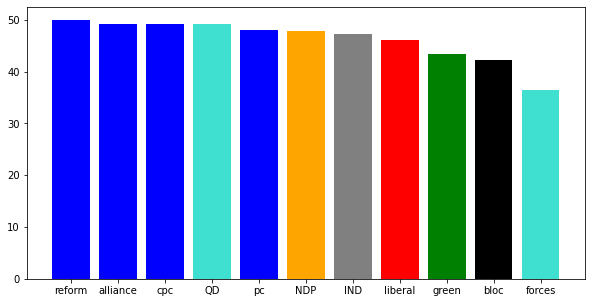

In [36]:
plt.figure(figsize=(10,5))
plt.title = 'Flesch Reading Ease by Party'
plt.xlabel= 'party name slug'
plt.ylabel = 'Flesch Reading Ease score'
plt.bar(reading_ease_party.slug, reading_ease_party.reading_ease, 
        color=party_colours)

plt.show()

In [37]:
reading_ease_party.slug

0       reform
1     alliance
2          cpc
3           QD
4           pc
5          NDP
6          IND
7      liberal
8        green
9         bloc
10      forces
Name: slug, dtype: object

In [38]:
reading_ease_politician['party_colour'] = reading_ease_politician.party_id.replace(party_colour_dict)

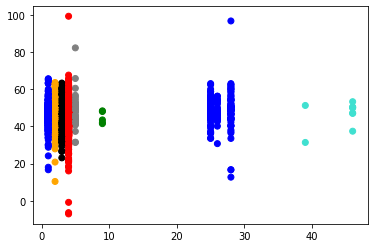

In [39]:
plt.scatter(reading_ease_politician.party_id, reading_ease_politician.reading_ease,c=reading_ease_politician.party_colour)
plt.show()

In [61]:
reading_ease_politician.sort_values(by='reading_ease', ascending=True)

,politician_id,reading_ease,id,riding_id,party_id,end_date,start_date,party_colour
94,72,-7.040588,3673,24044,4,2015-10-19,1999-10-12,red
593,577,-6.351009,1028,35024,4,NaN,2008-11-18,red
1423,10878,-0.820000,4589,24049,4,NaN,2019-10-21,red
1468,11678,10.413784,4579,46011,2,NaN,2019-10-21,orange
1025,5358,12.716211,2448,48006,28,2000-10-22,1997-09-22,blue
...,...,...,...,...,...,...,...,...
1249,9634,65.771333,4240,70284,4,2017-08-31,2015-10-19,red
968,4748,67.589556,2620,35074,4,2000-10-22,1997-09-22,red
466,399,82.226479,320,24051,5,2011-03-26,2006-04-03,grey
891,3943,96.700000,3057,48010,28,2000-10-22,1994-01-17,blue


In [40]:
df_environment = df[df.h2_en=='The Environment']

In [41]:
df_environment.shape

(16273, 38)

In [42]:
df_environment.pivot_table(values='reading_ease',index='party_id',aggfunc='mean').sort_values(by='reading_ease', ascending=False)

,reading_ease
party_id,
1,47.755124
25,47.335554
9,46.901587
28,46.696120
4,44.829145
26,43.881028
2,42.873220
5,40.691007
46,39.732069


In [43]:
def getReadingEaseBy_h2_Topic(topic):
    topic_pivot = df[df.h2_en==topic].pivot_table(values='reading_ease',index='party_id',aggfunc='mean')
    topic_pivot.sort_values(by='reading_ease', ascending=False, inplace = True)
    return topic_pivot

In [44]:
getReadingEaseBy_h2_Topic('Committees of the House')

,reading_ease
party_id,
39,84.000000
46,60.360645
9,56.092308
2,55.224808
5,54.769080
3,54.274110
26,50.099580
1,45.583762
28,44.379321


In [45]:
df_carbon = df[df.h2_en.str.contains('Carbon')]

In [46]:
df_carbon.pivot_table(values='reading_ease', index='party_id', aggfunc='mean').sort_values(by='reading_ease', ascending=False)

,reading_ease
party_id,
4,55.680502
1,52.770627
25,51.422353
2,48.091667
28,47.036667
9,36.250000
5,32.570000
3,25.990000
26,24.820000


In [47]:
from textblob import TextBlob

In [48]:
TextBlob(df_carbon.soup.iloc[0]).sentiment

Sentiment(polarity=0.186, subjectivity=0.49399999999999994)

In [49]:
df_carbon['sentiment'] = df_carbon.soup.apply(lambda x: TextBlob(x).sentiment[0])

C:\Users\alecr\Anaconda3\envs\gensim_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_carbon['subjectivity'] = df_carbon.soup.apply(lambda x: TextBlob(x).sentiment[1])

C:\Users\alecr\Anaconda3\envs\gensim_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
green_sentiments = df_carbon[df_carbon.party_id==9].sentiment

In [52]:
df[df.h3_en =='Cancellation of Teck Frontier Mine Project'].soup

852321    Mr. Speaker, I am requesting an emergency deba...
Name: soup, dtype: object

In [53]:
df.columns

Index(['id', 'politician_id', 'riding_id', 'party_id', 'end_date',
       'start_date', 'id.1', 'document_id', 'time', 'h1_en', 'h2_en',
       'member_id', 'who_en', 'content_en', 'sequence_en', 'wordcount',
       'politician_id.1', 'procedural', 'h3_en', 'who_hocid', 'content_fr',
       'statement_type', 'written_question', 'source_id', 'who_context_en',
       'slug', 'urlcache', 'h1_fr', 'h2_fr', 'h3_fr', 'who_fr',
       'who_context_fr', 'wordcount_en', 'tokenized_content', 'slug_length',
       'soup', 'text_len', 'reading_ease'],
      dtype='object')

In [54]:
df['end_date'][0]

'2005-11-29'

In [55]:
df['start_date'][0]

'1997-09-22'

In [56]:
sentiments = df.groupby(['h2_en', 'party_id'])

for h in df.h2_en[:50]:
    print('\n',h)

In [57]:
type(sentiments)

pandas.core.groupby.generic.DataFrameGroupBy

In [58]:
for d,v in sentiments[:5]:
    print( type(d))
    print( type(v))

TypeError: unhashable type: 'slice'